In [2]:
from scipy import sparse
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


from surprise import SVD
from surprise.model_selection import cross_validate

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns


### Exploring K-means clustering for recommendations

In [3]:
df = pd.read_csv('datasets/checkpoint_lyrics.csv')

In [4]:
df.head(3)

,index,track_name,track_id,track_pop,artist_name,featured_artist,album_name,artist_id,danceability,energy,...,mode,speechiness,acousticness,intrumentalness,valence,tempo,track_lyrics,playlist_name,playlist_id,lyrics
0,0,Codeine Dreaming (feat. Lil Wayne),4DTpngLjoHj5gFxEZFeD3J,66,Kodak Black,Lil Wayne,Project Baby 2: All Grown Up (Deluxe Edition),46SHBwWsqBkxI7EeeBEQG7,0.736,0.604,...,0,0.222,0.0652,0.000064,0.574,155.007,Take that all the way up. I'm about to take of...,Best Hip-Hop Playlist,NaN,Take that all the way up. I'm about to take of...
1,1,Bank Account,2fQrGHiQOvpL9UgPvtYy6G,18,21 Savage,None,Issa Album,1URnnhqYAYcrqrcwql10ft,0.884,0.347,...,0,0.350,0.0150,0.000007,0.376,75.016,I tear down the mall with the bitch (for real)...,Best Hip-Hop Playlist,NaN,I tear down the mall with the bitch (for real)...
2,2,PICK IT UP (feat. A$AP Rocky),3ncgNpxLoBQ65ABk4djDyd,66,Famous Dex,A$AP Rocky,Pick It Up (feat. A$AP Rocky),0WOxhx4hikIsyF3CRPLC8W,0.921,0.467,...,1,0.119,0.0149,0.000238,0.287,135.995,"That's my fucking brother right there, ya dig?...",Best Hip-Hop Playlist,NaN,"That's my fucking brother right there, ya dig?..."


### Subset audio features

In [5]:
#danceability, engery, key, loudness, mode, speechiness, acousticness, instrumentalness,
# liveness, valence, tempo,
data = pd.DataFrame(df, columns = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'intrumentalness',
    'valence',
    'tempo'
])

### Scale data

In [6]:
ss = StandardScaler()
scaled = ss.fit_transform(data)
scaled = pd.DataFrame(scaled)

### K-Means Cluster

In [7]:
km = KMeans(n_clusters = 20)
km.fit(scaled)

KMeans(n_clusters=20)

In [8]:
silhouette_score(scaled, km.labels_)

0.12520475638023454

In [9]:
scores = []

for k in range(1,50):
    print(f'now evaluating k={k}')
    kmeans = KMeans(n_clusters=k, random_state=6)
    kmeans.fit(scaled)
    scores.append([k, kmeans.inertia_])

now evaluating k=1
now evaluating k=2
now evaluating k=3
now evaluating k=4
now evaluating k=5
now evaluating k=6
now evaluating k=7
now evaluating k=8
now evaluating k=9
now evaluating k=10
now evaluating k=11
now evaluating k=12
now evaluating k=13
now evaluating k=14
now evaluating k=15
now evaluating k=16
now evaluating k=17
now evaluating k=18
now evaluating k=19
now evaluating k=20
now evaluating k=21
now evaluating k=22
now evaluating k=23
now evaluating k=24
now evaluating k=25
now evaluating k=26
now evaluating k=27
now evaluating k=28
now evaluating k=29
now evaluating k=30
now evaluating k=31
now evaluating k=32
now evaluating k=33
now evaluating k=34
now evaluating k=35
now evaluating k=36
now evaluating k=37
now evaluating k=38
now evaluating k=39
now evaluating k=40
now evaluating k=41
now evaluating k=42
now evaluating k=43
now evaluating k=44
now evaluating k=45
now evaluating k=46
now evaluating k=47
now evaluating k=48
now evaluating k=49


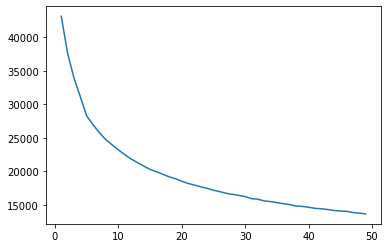

In [10]:
inertia_df = pd.DataFrame(scores, columns=['n_clusters', 'inertia'])
plt.plot(inertia_df['n_clusters'], inertia_df['inertia'])

In [11]:
scaled_data = scaled

scaled_data['labels'] = km.labels_

scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.343843,-0.340253,-1.159146,-0.148336,-1.242301,0.590571,-0.473986,-0.216380,0.329024,1.043595,19
1,1.277999,-1.854141,0.737114,-0.461423,-1.242301,1.582060,-0.723693,-0.216937,-0.520981,-1.902466,14
2,1.511538,-1.147267,-1.159146,-0.539155,0.804958,-0.207268,-0.724190,-0.214690,-0.903054,0.343385,11
3,1.252751,-1.377001,1.008008,-0.480496,0.804958,0.466635,-0.057145,-0.216514,-0.705578,-0.982050,9
4,0.413273,-0.811502,1.278902,0.049593,-1.242301,0.768729,-0.646095,-0.217005,-0.576790,0.492841,15


In [21]:
labeled_data = data

labeled_data['labels'] = km.labels_

labeled_data.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,intrumentalness,valence,tempo,labels
0,0.736,0.604,1,-7.357,0,0.222,0.0652,0.000064,0.574,155.007,2
1,0.884,0.347,8,-8.227,0,0.350,0.0150,0.000007,0.376,75.016,9


In [23]:
all_data = df.merge(labeled_data)

In [24]:
all_data.head(2)

,index,track_name,track_id,track_pop,artist_name,featured_artist,album_name,artist_id,danceability,energy,...,speechiness,acousticness,intrumentalness,valence,tempo,track_lyrics,playlist_name,playlist_id,lyrics,labels
0,0,Codeine Dreaming (feat. Lil Wayne),4DTpngLjoHj5gFxEZFeD3J,66,Kodak Black,Lil Wayne,Project Baby 2: All Grown Up (Deluxe Edition),46SHBwWsqBkxI7EeeBEQG7,0.736,0.604,...,0.222,0.0652,0.000064,0.574,155.007,Take that all the way up. I'm about to take of...,Best Hip-Hop Playlist,NaN,Take that all the way up. I'm about to take of...,2
1,1,Bank Account,2fQrGHiQOvpL9UgPvtYy6G,18,21 Savage,None,Issa Album,1URnnhqYAYcrqrcwql10ft,0.884,0.347,...,0.350,0.0150,0.000007,0.376,75.016,I tear down the mall with the bitch (for real)...,Best Hip-Hop Playlist,NaN,I tear down the mall with the bitch (for real)...,9


In [35]:
all_data[all_data['labels']==4]

,index,track_name,track_id,track_pop,artist_name,featured_artist,album_name,artist_id,danceability,energy,...,speechiness,acousticness,intrumentalness,valence,tempo,track_lyrics,playlist_name,playlist_id,lyrics,labels
96,28,The Race,3wGXyJGsCf1myH5MooQIqE,73,Tay-K,None,#SantanaWorld (+),2ODbg2404zUzTi02qIPEjB,0.766,0.606,...,0.456,0.00266,0.000000,0.352,160.223,"You want action, you get turned into past tens...",Best Hip-Hop Playlist,NaN,"You want action, you get turned into past tens...",4
129,41,YuNg BrAtZ,2ooF4088y5L72c4YTEJQoB,76,XXXTENTACION,None,Revenge,15UsOTVnJzReFVN1VCnxy4,0.755,0.695,...,0.260,0.01790,0.000000,0.493,128.063,"Try me like an Opp and indeed, get shot down\r...",Best Hip-Hop Playlist,NaN,"Try me like an Opp and indeed, get shot down\r...",4
134,46,Plain Jane,4dVpf9jZjcORqGTLUaeYj9,75,A$AP Ferg,None,Still Striving,5dHt1vcEm9qb8fCyLcB3HL,0.797,0.844,...,0.275,0.06510,0.000000,0.520,170.142,Check in with me and do your job. Ferg is the ...,Best Hip-Hop Playlist,NaN,Check in with me and do your job. Ferg is the ...,4
135,46,Plain Jane,4dVpf9jZjcORqGTLUaeYj9,75,A$AP Ferg,None,Still Striving,5dHt1vcEm9qb8fCyLcB3HL,0.797,0.844,...,0.275,0.06510,0.000000,0.520,170.142,Check in with me and do your job. Ferg is the ...,Best Hip-Hop Playlist,NaN,Check in with me and do your job. Ferg is the ...,4
136,46,Plain Jane,4dVpf9jZjcORqGTLUaeYj9,75,A$AP Ferg,None,Still Striving,5dHt1vcEm9qb8fCyLcB3HL,0.797,0.844,...,0.275,0.06510,0.000000,0.520,170.142,Check in with me and do your job. Ferg is the ...,Best Hip-Hop Playlist,NaN,Check in with me and do your job. Ferg is the ...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,4234,Survivor,7qtAgn9mwxygsPOsUDVRRt,65,Destiny's Child,None,Survivor,1Y8cdNmUJH7yBTd9yOvr5i,0.524,0.904,...,0.398,0.05330,0.000000,0.655,161.188,"You thought that I'd be weak without you, but ...",Top 100 Motivational Songs in The World!,6Oer1XR6bNH6rMnbPxKzOV,"You thought that I'd be weak without you, but ...",4
5796,4143,Stand By You,3kSXn1osC89W8JcPLozTzs,65,Rachel Platten,None,Wildfire,3QLIkT4rD2FMusaqmkepbq,0.506,0.897,...,0.260,0.14600,0.000451,0.525,188.030,NaN,Top 100 Motivational Songs in The World!,6Oer1XR6bNH6rMnbPxKzOV,Put your empty hands in mine. And scars. Show ...,4
5797,4143,Stand By You,3kSXn1osC89W8JcPLozTzs,65,Rachel Platten,None,Wildfire,3QLIkT4rD2FMusaqmkepbq,0.506,0.897,...,0.260,0.14600,0.000451,0.525,188.030,NaN,Top 100 Motivational Songs in The World!,6Oer1XR6bNH6rMnbPxKzOV,Put your empty hands in mine. And scars. Show ...,4
5798,4260,Stand By You,3kSXn1osC89W8JcPLozTzs,65,Rachel Platten,None,Wildfire,3QLIkT4rD2FMusaqmkepbq,0.506,0.897,...,0.260,0.14600,0.000451,0.525,188.030,Put your empty hands in mine. And scars. Show ...,Top 100 Motivational Songs in The World!,6Oer1XR6bNH6rMnbPxKzOV,Put your empty hands in mine. And scars. Show ...,4


In [31]:
all_data.groupby('labels').mean(['danceability'])

,index,track_pop,danceability,energy,key,loudness,mode,speechiness,acousticness,intrumentalness,valence,tempo
labels,,,,,,,,,,,,
0,2689.422078,40.746753,0.585130,0.440539,3.538961,-11.564351,0.798701,0.058222,0.125175,0.075726,0.243518,118.907045
1,2909.695312,52.980469,0.739061,0.779557,8.820312,-5.374283,0.000000,0.103497,0.105980,0.018773,0.697902,115.000187
2,1289.838028,37.679577,0.785754,0.639915,6.693662,-6.901437,0.000000,0.317093,0.128322,0.000423,0.519725,145.375708
3,2841.060150,47.759398,0.528895,0.291586,5.616541,-11.889887,0.766917,0.056817,0.746782,0.017450,0.292147,99.811481
4,1820.367769,40.140496,0.704306,0.745744,7.888430,-5.471917,0.995868,0.286269,0.113841,0.006869,0.542502,157.254599
5,2874.397149,48.692464,0.662163,0.831055,1.293279,-5.237929,1.000000,0.074692,0.078037,0.007496,0.733442,126.326735
6,2909.183333,31.175000,0.591008,0.733187,5.575000,-7.945658,0.608333,0.078408,0.150103,0.642900,0.494613,128.848658
7,2817.965079,42.050794,0.461168,0.769654,4.419048,-6.171765,1.000000,0.074234,0.084746,0.014632,0.420147,156.946083
8,2097.776471,45.461765,0.775768,0.647088,1.244118,-6.052329,1.000000,0.136827,0.098466,0.002455,0.406319,109.099547


#### This was not used. I was exploring ways to cluster the songs. Further analysis will need to be done on clustering based on key characteristics and how to implement into the app. 